## Descriptive Analysis of OULAD dataset

In [3]:
import pandas as pd
import numpy as np
import missingno as msno
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pl

from IPython.display import display

sns.set()
pd.options.display.max_columns = None


### Charging the dataset into memory

In [4]:
assessments_df         = pd.read_csv('./OULAD/assessments.csv')
courses_df             = pd.read_csv('./OULAD/courses.csv')
studentAssessment_df   = pd.read_csv('./OULAD/studentAssessment.csv')
studentInfo_df         = pd.read_csv('./OULAD/studentInfo.csv')
studentRegistration_df = pd.read_csv('./OULAD/studentRegistration.csv')
studentVle_df          = pd.read_csv('./OULAD/studentVle.csv')
vle_df                 = pd.read_csv('./OULAD/vle.csv')

#### Inspecting assessments table

In [35]:
display(assessments_df)
print(assessments_df.info())
display(assessments_df.describe())
for col in ['code_module', 'code_presentation', 'assessment_type']:
    print('%s FREQUENCIES' % (col))
    print(assessments_df[col].value_counts(dropna=False))
    print('')
print('\nTHE SKEW')
print(assessments_df.skew().sort_values())
print('\nTHE KURTOSIS')
print(assessments_df.kurt().sort_values())

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0
...,...,...,...,...,...,...
201,GGG,2014J,37443,CMA,229.0,0.0
202,GGG,2014J,37435,TMA,61.0,0.0
203,GGG,2014J,37436,TMA,124.0,0.0
204,GGG,2014J,37437,TMA,173.0,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        206 non-null    object 
 1   code_presentation  206 non-null    object 
 2   id_assessment      206 non-null    int64  
 3   assessment_type    206 non-null    object 
 4   date               195 non-null    float64
 5   weight             206 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.8+ KB
None


,id_assessment,date,weight
count,206.000000,195.000000,206.000000
mean,26473.975728,145.005128,20.873786
std,10098.625521,76.001119,30.384224
min,1752.000000,12.000000,0.000000
25%,15023.250000,71.000000,0.000000
50%,25364.500000,152.000000,12.500000
75%,34891.750000,222.000000,24.250000
max,40088.000000,261.000000,100.000000


code_module FREQUENCIES
FFF    52
BBB    42
DDD    35
GGG    30
CCC    20
EEE    15
AAA    12
Name: code_module, dtype: int64

code_presentation FREQUENCIES
2014J    57
2014B    57
2013J    53
2013B    39
Name: code_presentation, dtype: int64

assessment_type FREQUENCIES
TMA     106
CMA      76
Exam     24
Name: assessment_type, dtype: int64


THE SKEW
id_assessment   -0.804555
date            -0.256035
weight           1.961551
dtype: float64

THE KURTOSIS
date            -1.368622
id_assessment   -0.160297
weight           2.586504
dtype: float64


#### Inspecting courses table

In [34]:
display(courses_df)
print(courses_df.info())
display(courses_df.describe())
for col in ['code_module', 'code_presentation', 'module_presentation_length']:
    print('%s FREQUENCIES' % (col))
    print(courses_df[col].value_counts(dropna=False))
    print('')

print(courses_df['module_presentation_length'].value_counts(dropna=False))
print('\nTHE SKEW')
print(courses_df.skew().sort_values())
print('\nTHE KURTOSIS')
print(courses_df.kurt().sort_values())

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240
5,BBB,2014B,234
6,CCC,2014J,269
7,CCC,2014B,241
8,DDD,2013J,261
9,DDD,2014J,262


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   code_module                 22 non-null     object
 1   code_presentation           22 non-null     object
 2   module_presentation_length  22 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 656.0+ bytes
None


,module_presentation_length
count,22.000000
mean,255.545455
std,13.654677
min,234.000000
25%,241.000000
50%,261.500000
75%,268.000000
max,269.000000


code_module FREQUENCIES
BBB    4
DDD    4
FFF    4
GGG    3
EEE    3
CCC    2
AAA    2
Name: code_module, dtype: int64

code_presentation FREQUENCIES
2014J    7
2014B    6
2013J    6
2013B    3
Name: code_presentation, dtype: int64

module_presentation_length FREQUENCIES
241    5
269    5
268    4
240    3
262    2
261    2
234    1
Name: module_presentation_length, dtype: int64

241    5
269    5
268    4
240    3
262    2
261    2
234    1
Name: module_presentation_length, dtype: int64

THE SKEW
module_presentation_length   -0.326943
dtype: float64

THE KURTOSIS
module_presentation_length   -1.876775
dtype: float64


#### Inspecting studentAssessment table

In [32]:
display(studentAssessment_df)
print(studentAssessment_df.info())
display(studentAssessment_df.describe())
print('is_banked FREQUENCIES')
print(studentAssessment_df['is_banked'].value_counts(dropna=False))
print('\nTHE SKEW')
print(studentAssessment_df.skew().sort_values())
print('\nTHE KURTOSIS')
print(studentAssessment_df.kurt().sort_values())

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0
...,...,...,...,...,...
173907,37443,527538,227,0,60.0
173908,37443,534672,229,0,100.0
173909,37443,546286,215,0,80.0
173910,37443,546724,230,0,100.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173912 entries, 0 to 173911
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id_assessment   173912 non-null  int64  
 1   id_student      173912 non-null  int64  
 2   date_submitted  173912 non-null  int64  
 3   is_banked       173912 non-null  int64  
 4   score           173739 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 6.6 MB
None


,id_assessment,id_student,date_submitted,is_banked,score
count,173912.000000,1.739120e+05,173912.000000,173912.000000,173739.000000
mean,26553.803556,7.051507e+05,116.032942,0.010977,75.799573
std,8829.784254,5.523952e+05,71.484148,0.104194,18.798107
min,1752.000000,6.516000e+03,-11.000000,0.000000,0.000000
25%,15022.000000,5.044290e+05,51.000000,0.000000,65.000000
50%,25359.000000,5.852080e+05,116.000000,0.000000,80.000000
75%,34883.000000,6.344980e+05,173.000000,0.000000,90.000000
max,37443.000000,2.698588e+06,608.000000,1.000000,100.000000


is_banked FREQUENCIES
0    172003
1      1909
Name: is_banked, dtype: int64

THE SKEW
score            -1.075661
id_assessment    -0.524081
date_submitted    0.178825
id_student        2.428332
is_banked         9.386891
dtype: float64

THE KURTOSIS
date_submitted    -0.892050
id_assessment     -0.695526
score              1.529458
id_student         5.042259
is_banked         86.114709
dtype: float64


#### Inspecting studentInfo table

In [38]:
display(studentInfo_df)
print(studentInfo_df.info())
display(studentInfo_df.describe())
for col in ['gender', 'disability', 'age_band', 'code_presentation', 'final_result', 'highest_education', 'code_module', 'num_of_prev_attempts', 'imd_band', 'region', 'studied_credits']:
    print('%s FREQUENCIES' % (col))
    print(studentInfo_df[col].value_counts(dropna=False))
    print('')
print('THE SKEW')
print(studentInfo_df.skew().sort_values())
print('\nTHE KURTOSIS')
print(studentInfo_df.kurt().sort_values())

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           32593 non-null  object
 1   code_presentation     32593 non-null  object
 2   id_student            32593 non-null  int64 
 3   gender                32593 non-null  object
 4   region                32593 non-null  object
 5   highest_education     32593 non-null  object
 6   imd_band              31482 non-null  object
 7   age_band              32593 non-null  object
 8   num_of_prev_attempts  32593 non-null  int64 
 9   studied_credits       32593 non-null  int64 
 10  disability            32593 non-null  object
 11  final_result          32593 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB
None


,id_student,num_of_prev_attempts,studied_credits
count,3.259300e+04,32593.000000,32593.000000
mean,7.066877e+05,0.163225,79.758691
std,5.491673e+05,0.479758,41.071900
min,3.733000e+03,0.000000,30.000000
25%,5.085730e+05,0.000000,60.000000
50%,5.903100e+05,0.000000,60.000000
75%,6.444530e+05,0.000000,120.000000
max,2.716795e+06,6.000000,655.000000


gender FREQUENCIES
M    17875
F    14718
Name: gender, dtype: int64

disability FREQUENCIES
N    29429
Y     3164
Name: disability, dtype: int64

age_band FREQUENCIES
0-35     22944
35-55     9433
55<=       216
Name: age_band, dtype: int64

code_presentation FREQUENCIES
2014J    11260
2013J     8845
2014B     7804
2013B     4684
Name: code_presentation, dtype: int64

final_result FREQUENCIES
Pass           12361
Withdrawn      10156
Fail            7052
Distinction     3024
Name: final_result, dtype: int64

highest_education FREQUENCIES
A Level or Equivalent          14045
Lower Than A Level             13158
HE Qualification                4730
No Formal quals                  347
Post Graduate Qualification      313
Name: highest_education, dtype: int64

code_module FREQUENCIES
BBB    7909
FFF    7762
DDD    6272
CCC    4434
EEE    2934
GGG    2534
AAA     748
Name: code_module, dtype: int64

num_of_prev_attempts FREQUENCIES
0    28421
1     3299
2      675
3      142
4       39
5  

#### Inspecting studentRegistration table

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN
...,...,...,...,...,...
32588,GGG,2014J,2640965,-4.0,NaN
32589,GGG,2014J,2645731,-23.0,NaN
32590,GGG,2014J,2648187,-129.0,NaN
32591,GGG,2014J,2679821,-49.0,101.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   code_module          32593 non-null  object 
 1   code_presentation    32593 non-null  object 
 2   id_student           32593 non-null  int64  
 3   date_registration    32548 non-null  float64
 4   date_unregistration  10072 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.2+ MB
None


,id_student,date_registration,date_unregistration
count,3.259300e+04,32548.000000,10072.000000
mean,7.066877e+05,-69.411300,49.757645
std,5.491673e+05,49.260522,82.460890
min,3.733000e+03,-322.000000,-365.000000
25%,5.085730e+05,-100.000000,-2.000000
50%,5.903100e+05,-57.000000,27.000000
75%,6.444530e+05,-29.000000,109.000000
max,2.716795e+06,167.000000,444.000000


code_presentation FREQUENCIES
2014J    11260
2013J     8845
2014B     7804
2013B     4684
Name: code_presentation, dtype: int64

code_module FREQUENCIES
BBB    7909
FFF    7762
DDD    6272
CCC    4434
EEE    2934
GGG    2534
AAA     748
Name: code_module, dtype: int64

THE SKEW
date_registration     -1.008369
date_unregistration    0.245486
id_student             2.454250
dtype: float64

THE KURTOSIS
date_unregistration   -0.061019
date_registration      1.001812
id_student             5.200364
dtype: float64

fun fact: registration date positively correlated with unregistration date


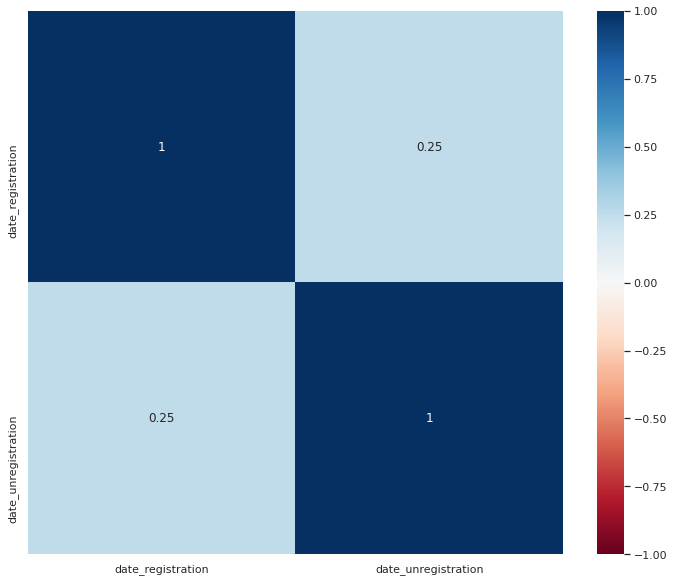

In [42]:
display(studentRegistration_df)
print(studentRegistration_df.info())
display(studentRegistration_df.describe())
for col in ['code_presentation', 'code_module']:
    print('%s FREQUENCIES' % (col))
    print(studentRegistration_df[col].value_counts(dropna=False))
    print('')
print('THE SKEW')
print(studentRegistration_df.skew().sort_values())
print('\nTHE KURTOSIS')
print(studentRegistration_df.kurt().sort_values())

print('\nfun fact: registration date positively correlated with unregistration date')
plt.figure(figsize = (12,10))
sns.heatmap(studentRegistration_df.drop(['id_student'], axis=1).corr(), annot=True, cmap="RdBu", vmin=-1, vmax=1)
plt.show()

#### Inspecting studentVle table
(10M rows with 6 columns - this might take a couple of seconds...)

In [50]:
display(studentVle_df)
print(studentVle_df.info())
display(studentVle_df.describe())
for col in ['code_presentation', 'code_module']:
    print('%s FREQUENCIES' % (col))
    print(studentVle_df[col].value_counts(dropna=False))
    print('')
print('THE SKEW')
print(studentVle_df.drop(['id_student', 'id_site'], axis=1).skew().sort_values())
print('\nTHE KURTOSIS')
print(studentVle_df.drop(['id_student', 'id_site'], axis=1).kurt().sort_values())

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1
...,...,...,...,...,...,...
10655275,GGG,2014J,675811,896943,269,3
10655276,GGG,2014J,675578,896943,269,1
10655277,GGG,2014J,654064,896943,269,3
10655278,GGG,2014J,654064,896939,269,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10655280 entries, 0 to 10655279
Data columns (total 6 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   code_module        object
 1   code_presentation  object
 2   id_student         int64 
 3   id_site            int64 
 4   date               int64 
 5   sum_click          int64 
dtypes: int64(4), object(2)
memory usage: 487.8+ MB
None


,id_student,id_site,date,sum_click
count,1.065528e+07,1.065528e+07,1.065528e+07,1.065528e+07
mean,7.333336e+05,7.383234e+05,9.517400e+01,3.716946e+00
std,5.827060e+05,1.312196e+05,7.607130e+01,8.849047e+00
min,6.516000e+03,5.267210e+05,-2.500000e+01,1.000000e+00
25%,5.077430e+05,6.735190e+05,2.500000e+01,1.000000e+00
50%,5.882360e+05,7.300690e+05,8.600000e+01,2.000000e+00
75%,6.464840e+05,8.770300e+05,1.560000e+02,3.000000e+00
max,2.698588e+06,1.049562e+06,2.690000e+02,6.977000e+03


code_presentation FREQUENCIES
2014J    3619452
2013J    2988784
2014B    2160176
2013B    1886868
Name: code_presentation, dtype: int64

code_module FREQUENCIES
FFF    4014499
DDD    2166486
BBB    1567564
CCC    1207827
EEE     961433
GGG     387173
AAA     350298
Name: code_module, dtype: int64

THE SKEW
date           0.337181
sum_click    122.920996
dtype: float64

THE KURTOSIS
date            -1.146259
sum_click    66447.907210
dtype: float64


#### Inspecting vle table

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN
...,...,...,...,...,...,...
6359,897063,GGG,2014J,resource,NaN,NaN
6360,897109,GGG,2014J,resource,NaN,NaN
6361,896965,GGG,2014J,oucontent,NaN,NaN
6362,897060,GGG,2014J,resource,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6364 entries, 0 to 6363
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_site            6364 non-null   int64  
 1   code_module        6364 non-null   object 
 2   code_presentation  6364 non-null   object 
 3   activity_type      6364 non-null   object 
 4   week_from          1121 non-null   float64
 5   week_to            1121 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 298.4+ KB
None


,id_site,week_from,week_to
count,6.364000e+03,1121.000000,1121.000000
mean,7.260991e+05,15.204282,15.214987
std,1.283151e+05,8.792865,8.779806
min,5.267210e+05,0.000000,0.000000
25%,6.615928e+05,8.000000,8.000000
50%,7.300965e+05,15.000000,15.000000
75%,8.140162e+05,22.000000,22.000000
max,1.077905e+06,29.000000,29.000000


code_presentation FREQUENCIES
2013J    1772
2014B    1671
2014J    1670
2013B    1251
Name: code_presentation, dtype: int64

code_module FREQUENCIES
FFF    1967
DDD    1708
BBB    1154
CCC     419
AAA     413
GGG     367
EEE     336
Name: code_module, dtype: int64

activity_type FREQUENCIES
resource          2660
subpage           1055
oucontent          996
url                886
forumng            194
quiz               127
page               102
oucollaborate       82
questionnaire       61
ouwiki              49
dataplus            28
externalquiz        26
homepage            22
glossary            21
ouelluminate        21
dualpane            20
repeatactivity       5
htmlactivity         4
sharedsubpage        3
folder               2
Name: activity_type, dtype: int64

THE SKEW
id_site     -0.140075
week_from   -0.096343
week_to     -0.094665
dtype: float64

THE KURTOSIS
week_from   -1.193219
week_to     -1.192386
id_site     -0.930615
dtype: float64

fun fact: week_from correla

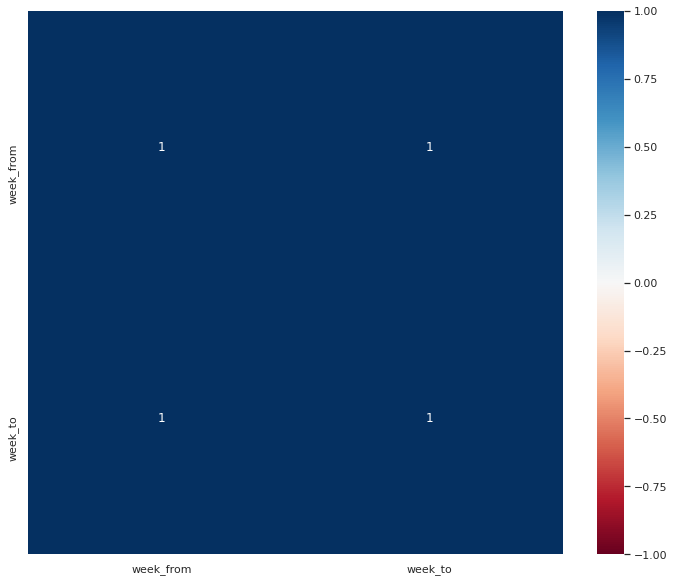

only 10 times from 1121 the week_from is different from week_to


In [80]:
display(vle_df)
print(vle_df.info())
display(vle_df.describe())
for col in ['code_presentation', 'code_module', 'activity_type']:
    print('%s FREQUENCIES' % (col))
    print(vle_df[col].value_counts(dropna=False))
    print('')
print('THE SKEW')
print(vle_df.skew().sort_values())
print('\nTHE KURTOSIS')
print(vle_df.kurt().sort_values())

print('\nfun fact: week_from correlated with week_to')

plt.figure(figsize = (12,10))
sns.heatmap(vle_df.drop(['id_site'], axis=1).corr(), annot=True, cmap="RdBu", vmin=-1, vmax=1)
plt.show()

countFromNotEqualTo = sum(vle_df['week_from'][~vle_df['week_from'].isna()] != vle_df['week_to'][~vle_df['week_to'].isna()])

print('only %i times from total %i the week_from is different from week_to' % (countFromNotEqualTo, sum(~vle_df['week_from'].isna())))